In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [8]:
ls

 3_2_ANSYS0.docx
 4_3_RL.docx
'AM - 03 18 2021.gdoc'
 AM_ML_.ipynb
 amProcess.ipynb
 AMReport.docx
 autoMLAM.ipynb
 blcokSPS.docx
'Copy of SPS0.pdf'
 data0.xlsx
 data1.xlsx
 data2.xlsx
 data3.xlsx
 data.xlsx
 designtool.m
 ED.docx
 ED.xlsx
 FFMATLAB.m
 generated.csv
 github_repo.zip
 GP.docx
 heat.png
 investigation_draft.docx
'Jet Engine Work.gdoc'
 jouleHeat.gdoc
'Joule heating initial model approach.gslides'
'Joule heating - Wikipedia.gdoc'
 jouleModel.gdraw
 matlab_h5_model.h5
 matlab_import.csv
'MATLAB Modeling and FEM Simulation of Heat Induced Stress'
 modelCompare.m
'Model Evaluation.docx'
 notes.ipynb
 ptest.m
'Ramp Thin Wall Images.pptx'
 RL/
 Solidification.gdoc
'Spark Plasma Sintering - Fundamentals.pdf'
 spot.tif
 spsINL.pptx
 SPSjoule.gdraw
 spsModel0.m
 spsModelSim.slx
 spsModelSim.slxc
 spsPID.gdoc
'SPS Research question.gdoc'
'SPS status.gdoc'
 spsTPOT.py
 state_dic_model.pt
 StatusSPS.docx
 temp_0_voltage.csv
 timelineSPS.xlsx
 timeplay.m
 tpot_insurance_best_model.py

In [7]:
os.chdir('Log')

In [ ]:
import random

In [ ]:
#random.random()
#random.sample(range(0,10), 5)

col0=[]
col1=[]
col2=[]

for i in range(0,1000):
  col0.append(random.random())
  col1.append(random.random())
  col2.append(random.random())


In [9]:
import numpy as np


In [ ]:
np.array([[3,4],[1, 4]], dtype=int)

array([[3, 4],
       [1, 4]])

In [ ]:
t=np.arange(0,10,0.01)
#t=np.linspace(0,10,1000)
t.size

1000

In [ ]:
dict_={'t':t, 'col0':col0, 'col1':col1, 'col2':col2}

In [11]:
import pandas as pd

In [ ]:
df=pd.DataFrame(data=dict_)

In [ ]:
df

,t,col0,col1,col2
0,0.00,0.190888,0.148660,0.306227
1,0.01,0.916640,0.638332,0.805809
2,0.02,0.061237,0.392963,0.936378
3,0.03,0.626591,0.435373,0.587460
4,0.04,0.807017,0.088346,0.401898
...,...,...,...,...
995,9.95,0.235470,0.565042,0.506596
996,9.96,0.765564,0.935492,0.488865
997,9.97,0.961694,0.837109,0.505442
998,9.98,0.175746,0.883729,0.328430


In [ ]:
df.to_csv('generated.csv',index=False)

In [ ]:
pwd

'/content/drive/My Drive/Log'

In [12]:
df=pd.read_csv('temp_0_voltage.csv')

In [19]:
df

,X,-3,-2,-1,0,1,x_0_1,x_0_2,v
2,0.2,293.150000,293.150000,293.150000,293.150026,293.150000,293.150003,293.150000,1.013333
3,0.3,293.150000,293.150000,293.150006,293.150118,293.150000,293.150026,293.150003,1.020000
4,0.4,293.150000,293.150000,293.150012,293.150217,293.150001,293.150118,293.150026,1.026667
5,0.5,293.150000,293.150001,293.150055,293.150547,293.150010,293.150217,293.150118,1.033333
6,0.6,293.150000,293.150002,293.150106,293.150937,293.150021,293.150547,293.150217,1.040000
...,...,...,...,...,...,...,...,...,...
1796,179.6,484.857174,516.490200,560.655102,598.290561,594.908944,598.316499,598.342436,1.000000
1797,179.7,484.916929,516.524904,560.656391,598.264624,594.892841,598.290561,598.316499,1.000000
1798,179.8,484.976683,516.559609,560.657680,598.238687,594.876738,598.264624,598.290561,1.000000
1799,179.9,485.036438,516.594313,560.658970,598.212750,594.860636,598.238687,598.264624,1.000000


In [14]:
df.loc[1:,'x_0_1']='NaN'
df.loc[2:,'x_0_2']='NaN'

In [15]:
df['x_0_1']=df.shift(periods=1)['0']
df['x_0_2']=df.shift(periods=2)['0']

In [ ]:
temp0=df['0'][1:]
temp1=df['0'][0:-2]

In [17]:
time=180
ts=0.1
n=(time/ts)

v=np.linspace(1,5,int(n/3)+1)
v=np.append(v,np.linspace(5,1,int(n/3)))
v=np.append(v,np.ones(shape=(int(n/3),1)))
v=v.transpose()
df['v']=v

In [18]:
df.drop(index=[0,1], axis=0, inplace=True)

In [ ]:
df.describe()

,X,-3,-2,-1,0,1,x_0_1,x_0_2,v
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,90.100000,386.811035,423.386307,480.662818,531.111369,501.022799,530.941810,530.772236,2.335183
std,51.947088,70.152814,85.146629,107.880420,128.885119,124.779114,128.997428,129.109409,1.334820
min,0.200000,293.150000,293.150000,293.150000,293.150026,293.150000,293.150003,293.150000,1.000000
25%,45.150000,307.771464,325.527737,364.418258,405.347323,361.137290,404.697474,404.049845,1.000000
50%,90.100000,397.629019,462.106472,560.462123,603.620618,588.477278,603.620618,603.620618,2.001669
75%,135.050000,454.923233,500.369600,562.638114,625.174936,601.854267,625.174936,625.174936,3.502087
max,180.000000,485.096193,516.629018,570.679390,645.539816,609.902843,645.539816,645.539816,5.000000


In [20]:
data=pd.DataFrame()
data['t']=df['X']
data['0']=df['0']
data['x_0_1']=df['x_0_1']
data['x_0_2']=df['x_0_2']
data['v']=df['v']
data

,t,0,x_0_1,x_0_2,v
2,0.2,293.150026,293.150003,293.150000,1.013333
3,0.3,293.150118,293.150026,293.150003,1.020000
4,0.4,293.150217,293.150118,293.150026,1.026667
5,0.5,293.150547,293.150217,293.150118,1.033333
6,0.6,293.150937,293.150547,293.150217,1.040000
...,...,...,...,...,...
1796,179.6,598.290561,598.316499,598.342436,1.000000
1797,179.7,598.264624,598.290561,598.316499,1.000000
1798,179.8,598.238687,598.264624,598.290561,1.000000
1799,179.9,598.212750,598.238687,598.264624,1.000000


In [21]:
data.to_csv('spsData.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['X'].values.size
#df.iloc[2][0:4]

1799

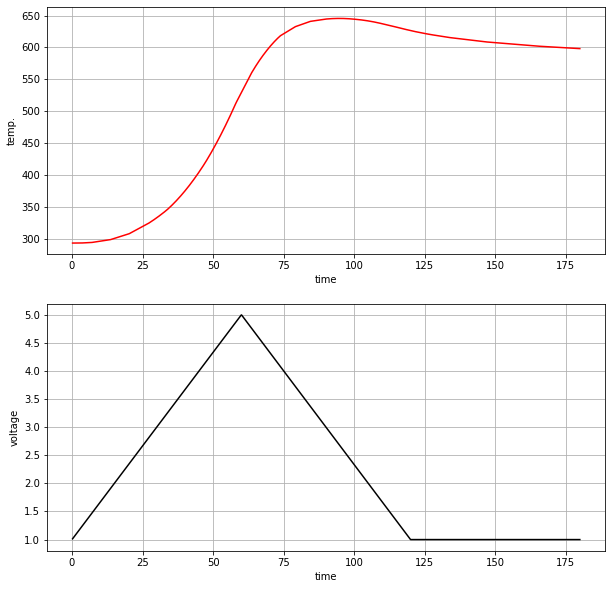

In [ ]:
#x=0, y=0
plt.figure(figsize=(10,10))
plt.subplot(2,1,1);
plt.plot(df['X'].values,df['0'].values, 'r')
plt.xlabel('time')
plt.ylabel('temp.')
plt.grid()
plt.subplot(2,1,2);
plt.plot(df['X'].values,df['v'].values, 'k')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6732dda810>,
      dtype=object)

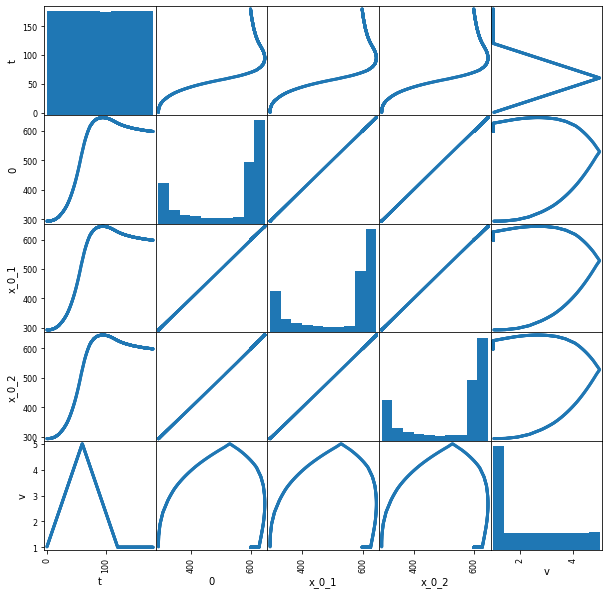

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(10,10))

In [ ]:
data.corr()

,t,0,x_0_1,x_0_2,v
t,1.000000,0.810314,0.810883,0.811450,-0.579591
0,0.810314,1.000000,0.999998,0.999990,-0.203765
x_0_1,0.810883,0.999998,1.000000,0.999998,-0.205704
x_0_2,0.811450,0.999990,0.999998,1.000000,-0.207643
v,-0.579591,-0.203765,-0.205704,-0.207643,1.000000


In [ ]:
import scipy as sp

In [ ]:
fft_=np.abs(sp.fft(data['0'].values))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


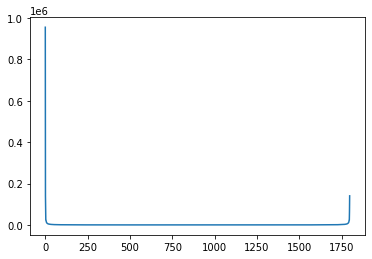

In [ ]:
plt.plot(fft_)

In [ ]:
pip install TPOT

     |████████████████████████████████| 87 kB 5.1 MB/s 
     |████████████████████████████████| 160 kB 28.0 MB/s 
     |████████████████████████████████| 166.7 MB 14 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=4497c22e1f39fc3a147d10fe85daeb38d683ce726406b55dc431c140e388f4ce
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# TPOT
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data=data.values
data = data.astype('float32')

In [ ]:
x, y= data[:,2:], data[:,1]
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model=TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)
model.fit(x,y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0016831922775096624

Generation 2 - Current best internal CV score: -0.0015076298310718642

Generation 3 - Current best internal CV score: -0.001507628369388223

Generation 4 - Current best internal CV score: -0.001507628369388223

Generation 5 - Current best internal CV score: -0.0014926653584723124

Best pipeline: LassoLarsCV(GradientBoostingRegressor(FastICA(input_matrix, tol=0.4), alpha=0.8, learning_rate=0.1, loss=quantile, max_depth=9, max_features=0.9500000000000001, min_samples_leaf=6, min_samples_split=12, n_estimators=100, subsample=0.1), normalize=False)


TPOTRegressor(config_dict=None, crossover_rate=0.1,
              cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              disable_update_check=False, early_stop=None, generations=5,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=1, scoring='neg_mean_absolute_error', subsample=1.0,
              template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
model.export('spsTPOT.py')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [ ]:
training_features, testing_features, training_target, testing_target = train_test_split(data[:,2:], data[:,1], random_state=1)

# Average CV score on the training set was: -0.0014926653584723124
exported_pipeline = make_pipeline(
    FastICA(tol=0.4),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="quantile", max_depth=9, max_features=0.9500000000000001, min_samples_leaf=6, min_samples_split=12, n_estimators=100, subsample=0.1)),
    LassoLarsCV(normalize=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


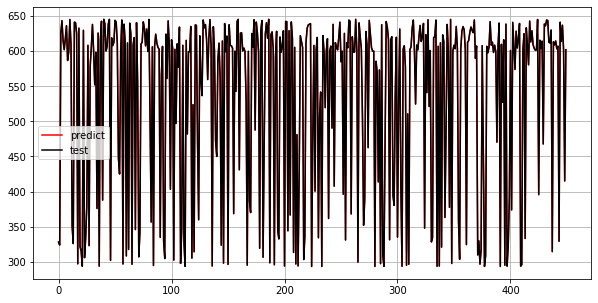

In [ ]:
result = exported_pipeline.predict(data[:,2:])

plt.figure(figsize=(10,5))
plt.plot(results,'r',testing_target,'k')
plt.grid()
plt.legend(['predict','test'])


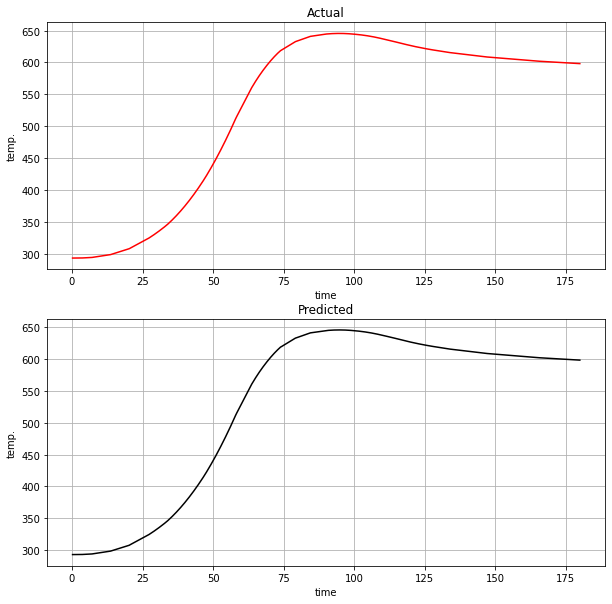

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1);
plt.plot(df['X'].values,df['0'].values, 'r')
plt.xlabel('time')
plt.ylabel('temp.')
plt.grid()
plt.title('Actual')
plt.subplot(2,1,2);
plt.plot(df['X'].values,result, 'k')
plt.xlabel('time')
plt.ylabel('temp.')
plt.title('Predicted')
plt.grid()
plt.show()